# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [2]:
# Your code here
df = pd.read_csv('data/ames.csv', index_col=0)

The following code checks that you loaded the data correctly:

In [3]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [4]:
# Run this cell without changes
df.shape

(1460, 80)

In [5]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

In [6]:
use_df = pd.read_csv('data/ames.csv', usecols=[80, 54, 18, 77, 19, 11])

In [7]:
use_df.head()

,LandSlope,OverallCond,YearBuilt,TotRmsAbvGrd,YrSold,SalePrice
0,Gtl,5,2003,8,2008,208500
1,Gtl,8,1976,6,2007,181500
2,Gtl,5,2001,6,2008,223500
3,Gtl,5,1915,7,2006,140000
4,Gtl,5,2000,9,2008,250000


### Sale Price

In the cell below, produce a histogram for `SalePrice`.

Text(450000, 540, 'Mean Sale Price: $180,921')

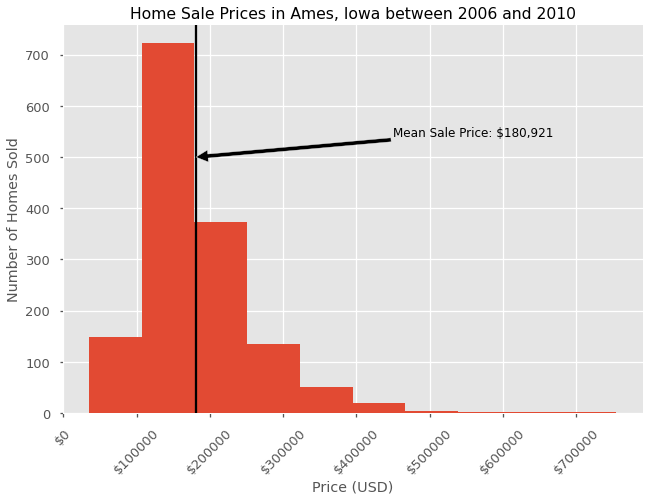

In [8]:
# Your code here
#use_df.hist(column='SalePrice');
plt.style.use('ggplot')
plt.style.use('seaborn-talk')

ax = use_df['SalePrice'].plot(kind='hist', rot=45, title='Home Sale Prices in Ames, Iowa between 2006 and 2010')
ax.set_xlabel("Price (USD)")
ax.xaxis.set_major_formatter('${x:1.0f}')
ax.set_ylabel("Number of Homes Sold")
ax.axvline(x=(use_df['SalePrice'].mean()), color='black')

ax.annotate('Mean Sale Price: $180,921', xy=(181000, 500), xytext=(450000, 540), color='black', size=12,
            arrowprops=dict(facecolor='black'))

Now, print out the mean, median, and standard deviation:

In [9]:
# Your code here
print('Mean:', use_df['SalePrice'].mean())
print('Median:',use_df['SalePrice'].median())
print('Standard Deviation:',use_df['SalePrice'].std())

Mean: 180921.19589041095
Median: 163000.0
Standard Deviation: 79442.50288288662


In the cell below, interpret the above information.

In [10]:
# Replace None with appropriate text
"""
The average home sale price is being pushed up by a few outlying more expensive homes.
The average home price only varies about $18 k from the median, however the std is $79k 
indicating there is a huge range of home prices. 
"""

'\nThe average home sale price is being pushed up by a few outlying more expensive homes.\nThe average home price only varies about $18 k from the median, however the std is $79k \nindicating there is a huge range of home prices. \n'

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

Text(9, 320, 'Mean Number of Rooms: 6.52')

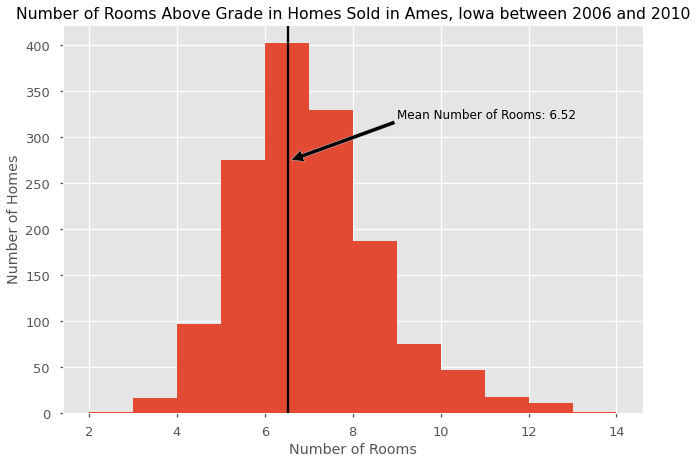

In [11]:
# Your code here
ax = use_df['TotRmsAbvGrd'].plot(kind='hist', bins=12, title='Number of Rooms Above Grade in Homes Sold in Ames, Iowa between 2006 and 2010')
ax.set_xlabel("Number of Rooms")
ax.set_ylabel("Number of Homes")
ax.axvline(x=(use_df['TotRmsAbvGrd'].mean()), color='black')

ax.annotate('Mean Number of Rooms: 6.52', xy=(6.6, 275), xytext=(9, 320), color='black', size=12,
            arrowprops=dict(facecolor='black'))

Now, print out the mean, median, and standard deviation:

In [12]:
# Your code here
print('Mean:', use_df['TotRmsAbvGrd'].mean())
print('Median:',use_df['TotRmsAbvGrd'].median())
print('Standard Deviation:',use_df['TotRmsAbvGrd'].std())

Mean: 6.517808219178082
Median: 6.0
Standard Deviation: 1.6253932905840505


In the cell below, interpret the above information.

In [13]:
# Replace None with appropriate text
"""
This shows the spread between the size of homes a bit better. 
The majority of homes have 6 above ground rooms. It is an almost even distribution, 
however, there is a very slight skew towards more than 6 rooms. 
"""

'\nThis shows the spread between the size of homes a bit better. \nThe majority of homes have 6 above ground rooms. It is an almost even distribution, \nhowever, there is a very slight skew towards more than 6 rooms. \n'

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

Text(7.25, 625, 'Mean Ranking: 5.58')

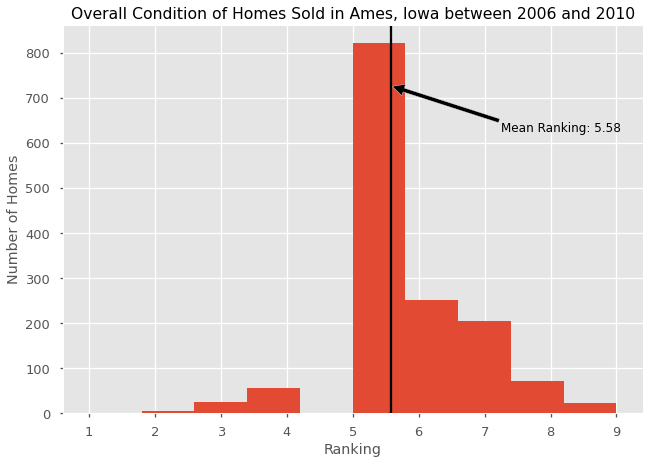

In [14]:
# Your code here
ax = use_df['OverallCond'].plot(kind='hist', title='Overall Condition of Homes Sold in Ames, Iowa between 2006 and 2010')
ax.set_xlabel("Ranking")
ax.set_ylabel("Number of Homes")
ax.axvline(x=(use_df['OverallCond'].mean()), color='black')

ax.annotate('Mean Ranking: 5.58', xy=(5.6, 725), xytext=(7.25, 625), color='black', size=12,
            arrowprops=dict(facecolor='black'))

Now, print out the mean, median, and standard deviation:

In [15]:
# Your code here
print('Mean:', use_df['OverallCond'].mean())
print('Median:',use_df['OverallCond'].median())
print('Standard Deviation:',use_df['OverallCond'].std())

Mean: 5.575342465753424
Median: 5.0
Standard Deviation: 1.1127993367127316


In the cell below, interpret the above information.

In [16]:
# Replace None with appropriate text
"""
Looks like a nice town to live in. Almost all the homes have an overall rating of 5 and above. 
Just visually looking at graph you can see only about 150 homes (of over 1400) have a rating below 5. 
"""

'\nLooks like a nice town to live in. Almost all the homes have an overall rating of 5 and above. \nJust visually looking at graph you can see only about 150 homes (of over 1400) have a rating below 5. \n'

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [17]:
# Replace None with appropriate code
below_average_condition = df[df['OverallCond'] < 5]
average_condition = df[df['OverallCond'] == 5]
above_average_condition = df[df['OverallCond'] > 5]


The following code checks that you created the subsets correctly:

In [18]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

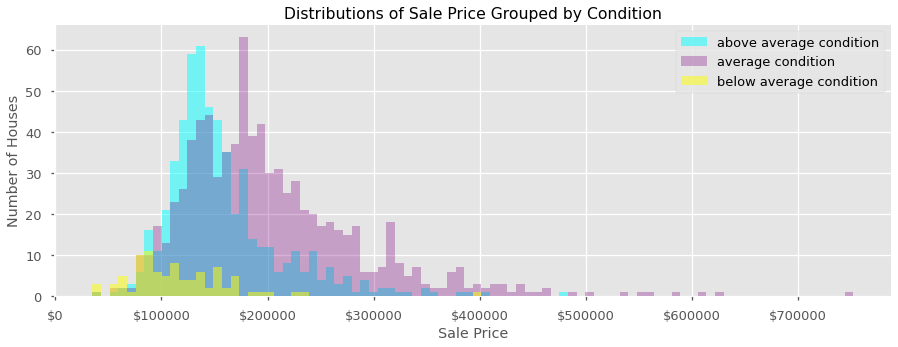

In [21]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="purple", #I made this purple because of grey background, hope thats ok
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.xaxis.set_major_formatter('${x:1.0f}') #I did also change this one thing, my OCD made me
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [22]:
# Replace None with appropriate text
"""
An above average rating does not have a significant impact on the sale price compaired to 
homes with an average rating. Homes that sold for more likely have other factors that
account for the higher sale price. 

However, having a below averge rating does significantly limit the sale price range, with
just a few exceptions. 

If I were advising a home seller I would suggest getting home up to at least an average condition
rating but beyond that, they may want to consider the other assests of the home and how those 
other assests impact sale price, before spending extra money going above and beyond on home condition.
"""

'\nAn above average rating does not have a significant impact on the sale price compaired to \nhomes with an average rating. Homes that sold for more likely have other factors that\naccount for the higher sale price. \n\nHowever, having a below averge rating does significantly limit the sale price range, with\njust a few exceptions. \n\nIf I were advising a home seller I would suggest getting home up to at least an average condition\nrating but beyond that, they may want to consider the other assests of the home and how those \nother assests impact sale price, before spending extra money going above and beyond on home condition.\n'

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [23]:
use_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LandSlope     1460 non-null   object
 1   OverallCond   1460 non-null   int64 
 2   YearBuilt     1460 non-null   int64 
 3   TotRmsAbvGrd  1460 non-null   int64 
 4   YrSold        1460 non-null   int64 
 5   SalePrice     1460 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 68.6+ KB


In [24]:
df['SalePrice'].corr(df['SalePrice'], method='pearson')             # test 1.0
df['SalePrice'].corr(df['OverallCond'], method='pearson')           # -0.0778
df['SalePrice'].corr(df['YearBuilt'], method='pearson')             # 0.5228
df['SalePrice'].corr(df['TotRmsAbvGrd'], method='pearson')          # 0.5337
df['SalePrice'].corr(df['YrSold'], method='pearson')                # -0.0289

-0.028922585168730374

In [25]:
#print out both the name of the column - and the Pearson correlation for the column - that is most positively correlated with SalePrice
# Your code here
print('"TotRmsAbvGrd" has the strongest positive correlation with "SalePrice" @ 0.5337')

"TotRmsAbvGrd" has the strongest positive correlation with "SalePrice" @ 0.5337


Now, find the ***most negatively correlated*** column:

In [26]:
# Your code here
print('"OverallCond" is the most negatively correlated with "SalePrice" @ -0.0778')

"OverallCond" is the most negatively correlated with "SalePrice" @ -0.0778


Once you have your answer, edit the code below so that it produces a scatter plot of the relevant columns.

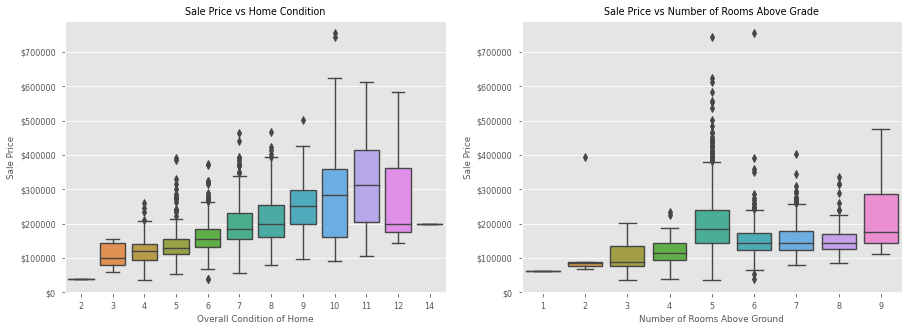

In [46]:
# Replace None with appropriate code

import seaborn as sns
plt.style.use('seaborn-paper')

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df['TotRmsAbvGrd'],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df['OverallCond'],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title('Sale Price vs Home Condition')
ax1.set_xlabel("Overall Condition of Home")
ax1.set_ylabel("Sale Price")
ax1.yaxis.set_major_formatter('${x:1.0f}')
ax2.set_title('Sale Price vs Number of Rooms Above Grade')
ax2.set_xlabel("Number of Rooms Above Ground")
ax2.set_ylabel("Sale Price")
ax2.yaxis.set_major_formatter('${x:1.0f}');

Interpret the results below. Consult `data/data_description.txt` as needed.

In [28]:
# Replace None with appropriate text
"""
The above graphs paint a difffernt picture than strictly the numeric values. With the above graphs
you can see the outliers are affecting the numeric measurements.
The box plot on the left shows a positive correlation between overall condition of a home and the maximum 
possible sale price, and an increase in median sale price, with only the highest ratings not having 
a significant impact. 
Additionally, the box plot on the right shows that once the outliers are removed from the equation, 
rooms-above-ground does not impact the sale price significantly.  
"""

'\nThe above graphs paint a difffernt picture than strictly the numeric values. With the above graphs\nyou can see the outliers are affecting the numeric measurements.\nThe box plot on the left shows a positive correlation between overall condition of a home and the maximum \npossible sale price, and an increase in median sale price, with only the highest ratings not having \na significant impact. \nAdditionally, the box plot on the right shows that once the outliers are removed from the equation, \nrooms-above-ground does not impact the sale price significantly.  \n'

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [47]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

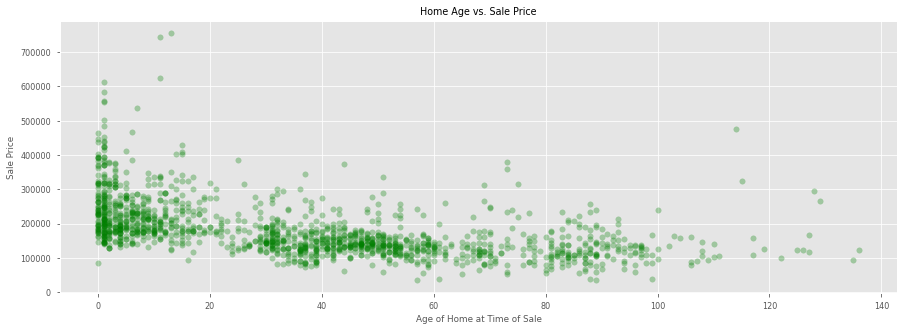

In [48]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

#no dollar signs again but I will force myself to not change it

Interpret this plot below:

In [1]:
# Replace None with appropriate text
"""
The old homes are selling at similar prices as the new homes. 
The homes in this area this retain thier value over the years.
"""

'\nThe old homes are selling at similar prices as the new homes. \nThe homes in this area this retain thier value over the years.\n'

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset! You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.